In [42]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [43]:
#####################
# Training data     # X & Y
#####################

Loading training dataset...



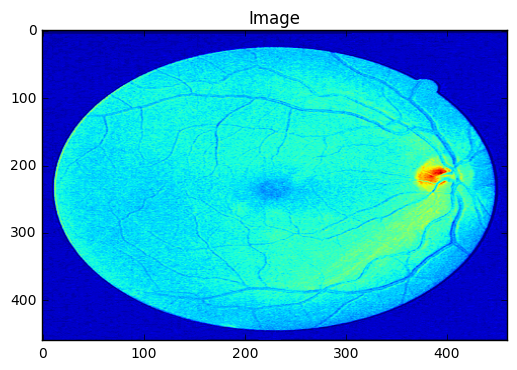

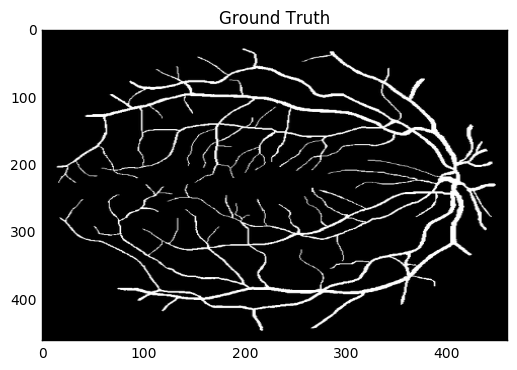

In [44]:
#DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW2/"
DATA_ROOT = "D:/Cesare/tf_UNET_int/NEW2/"
#
# Training
#
masks_dir = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_training_resized_training.tif"))

# Import data
print('Loading training dataset...\n')

X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

#
X_data=np.array(X_data)
Y_data=np.array(Y_data)
#
plt.imshow(X_data[19,...,2], aspect="auto")   # X_data[i,...,j]. i = 1,..., number of samples; j = 1,2,3
plt.title("Image")
plt.show()
plt.imshow(Y_data[19,..., ], aspect="auto",cmap='gray')
plt.title("Ground Truth")
plt.show()

In [45]:
#####################
# Standardization   # X
#####################

In [46]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_data_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_data[i,...,0])
    X_data_std.append(img_std)

#
X_data_std=np.array(X_data_std)
#

C:\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [47]:
print("TRAIN data  shape (Scaled):", X_data_std.shape)

print("TRAIN data  shape:", X_data.shape)
print("TRAIN label shape:", Y_data.shape)

TRAIN data  shape (Scaled): (20, 460, 460)
TRAIN data  shape: (20, 460, 460, 3)
TRAIN label shape: (20, 460, 460)


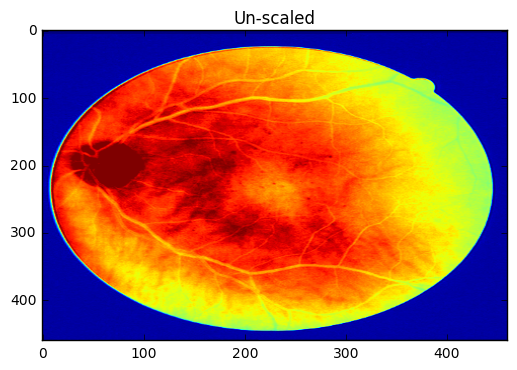

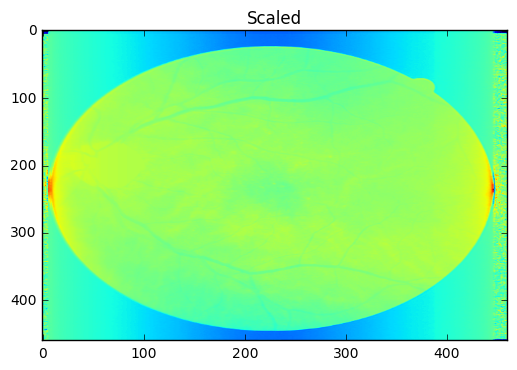

In [48]:
plt.imshow(X_data[0,...,0], aspect="auto")
plt.title("Un-scaled")
plt.show()
plt.imshow(X_data_std[0,...,], aspect="auto")
plt.title("Scaled")
plt.show()

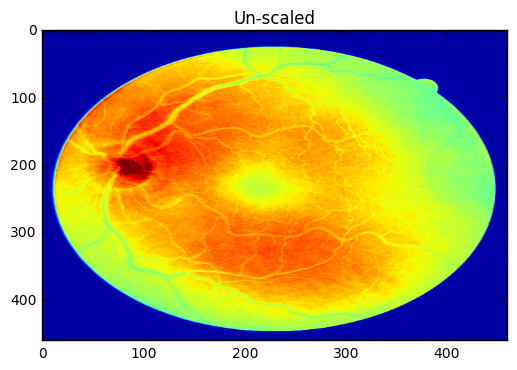

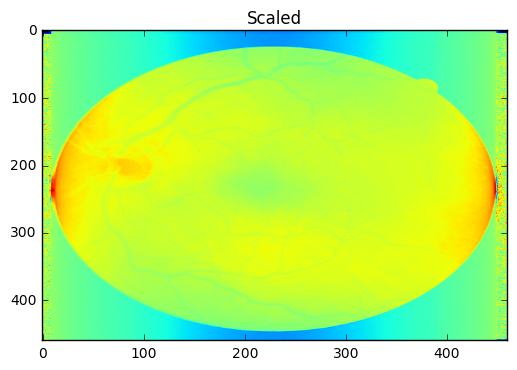

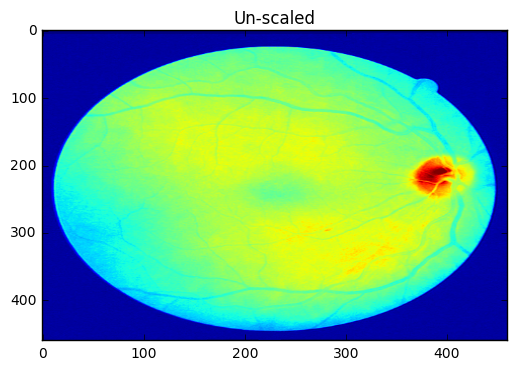

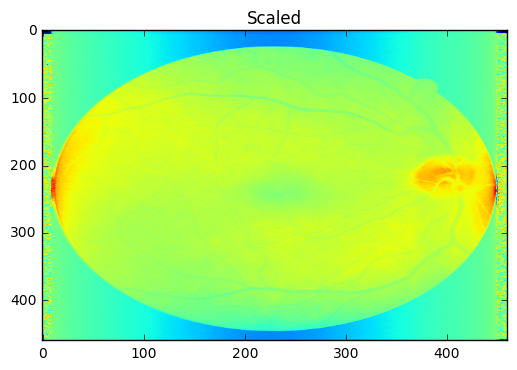

In [49]:
for i in range(18,20):
    plt.imshow(X_data[i,...,0], aspect="auto")
    plt.title("Un-scaled")
    plt.show()
    plt.imshow(X_data_std[i,...,], aspect="auto")
    plt.title("Scaled")
    plt.show()

In [50]:
#print(X_data[12])

In [51]:
print(X_data_std[12])

[[-5.69872845 -5.70445814 -5.62639384 ..., -5.44130244 -5.50028321
  -5.48182873]
 [-5.69872845 -5.70445814 -5.62639384 ..., -5.44130244 -5.50028321
  -5.48182873]
 [-5.69872845 -5.70445814 -5.62639384 ..., -5.44130244 -5.50028321
  -5.48182873]
 ..., 
 [-0.47975643 -1.18023272  0.32506616 ..., -1.29268511  0.10044789
   0.24917403]
 [-1.22532386 -1.93427029  0.32506616 ...,  0.78162356  0.80053928
   0.24917403]
 [-1.9708913  -1.18023272 -1.16279884 ..., -3.36699378 -4.10010044
  -3.3327027 ]]


In [52]:
#####################
# Testing  data     # X & Y
#####################

Loading testing dataset...



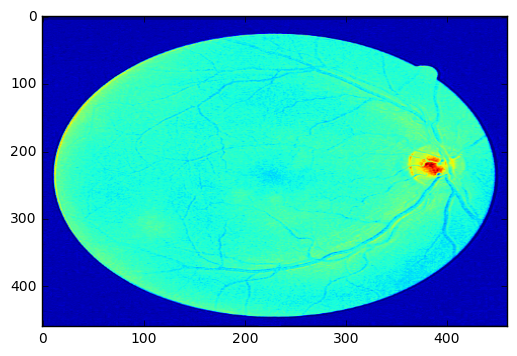

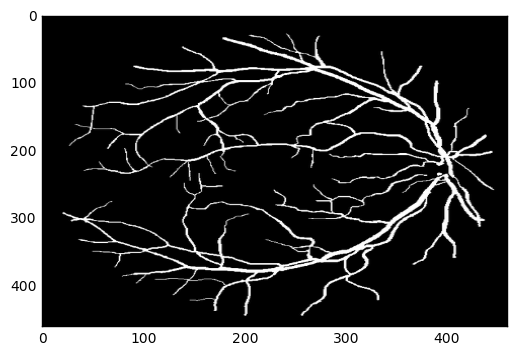

In [53]:
#
masks_Testing = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_Testing  = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_test_resized_testing.tif"))

# Import data
print('Loading testing dataset...\n')

X_test=[]
for index,entry in enumerate(imgs_Testing):
    img = misc.imread(entry)
    X_test.append(img)

Y_test=[]
for index,entry in enumerate(masks_Testing):
    img = misc.imread(entry)
    Y_test.append(img)

#
X_test=np.array(X_test)
Y_test=np.array(Y_test)
#
plt.imshow(X_test[19,...,2], aspect="auto")   
plt.show()
plt.imshow(Y_test[19,..., ], aspect="auto",cmap='gray')
plt.show()

In [54]:
#####################
# Standardization   # X
#####################

In [55]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_test_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_test[i,...,0])
    X_test_std.append(img_std)

#
X_test_std=np.array(X_test_std)
#

C:\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [56]:
print("TEST data  shape (Scaled):", X_test_std.shape)

print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", Y_test.shape)

TEST data  shape (Scaled): (20, 460, 460)
TEST  data  shape: (20, 460, 460, 3)
TEST  label shape: (20, 460, 460)


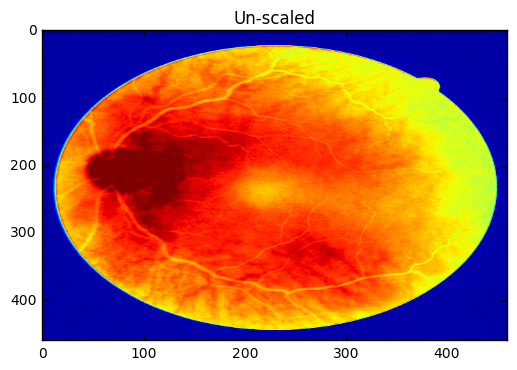

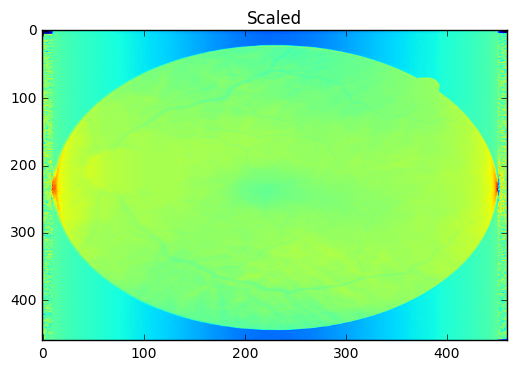

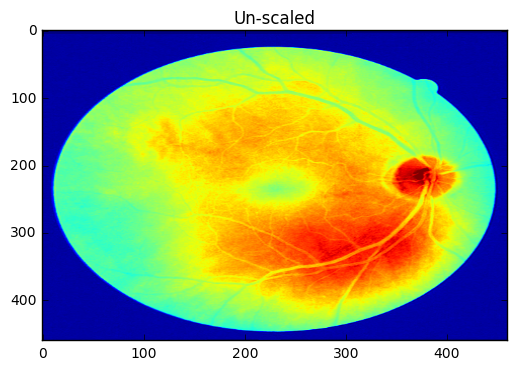

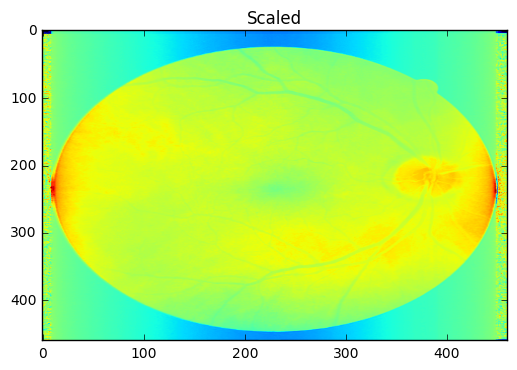

In [57]:
for i in range(8,10):
    plt.imshow(X_test[i,...,0], aspect="auto")
    plt.title("Un-scaled")
    plt.show()
    plt.imshow(X_test_std[i,...,], aspect="auto")
    plt.title("Scaled")
    plt.show()

In [58]:
for i in range(14,16):
    print(X_test_std[i])

[[-5.77260928 -5.67267646 -5.50558981 ..., -5.95782916 -5.83560634
  -5.71032783]
 [-5.77260928 -5.67267646 -5.50558981 ..., -5.95782916 -5.10216948
  -5.71032783]
 [-5.77260928 -5.67267646 -5.50558981 ..., -5.95782916 -5.83560634
  -5.71032783]
 ..., 
 [ 0.21307743  0.29173765  0.85943164 ...,  0.08539336  0.76532542
   0.17924796]
 [ 0.96128827  1.03728941  0.15220703 ...,  0.08539336  0.03188856
   0.17924796]
 [-0.53513341 -0.45381412  0.15220703 ..., -4.44702353 -4.36873262
  -4.23793388]]
[[-5.86842488 -5.85524218 -5.73560166 ..., -5.1960735  -5.36212526
  -5.39295392]
 [-5.86842488 -5.85524218 -5.73560166 ..., -5.1960735  -5.36212526
  -5.39295392]
 [-5.86842488 -5.09845336 -5.0093763  ..., -5.1960735  -5.36212526
  -5.39295392]
 ..., 
 [ 0.15215041  0.19906836  0.07420129 ..., -0.1253892  -0.1802395
  -0.69327554]
 [-0.6004215   0.19906836  0.07420129 ..., -0.1253892  -0.82797522
  -0.02189291]
 [ 1.65729423  0.19906836  0.07420129 ..., -4.56223796 -4.06665382
  -4.05018867]]


In [59]:
#print(X_test[14])

In [60]:
X_data = X_data.astype(np.float32)
Y_data = Y_data.astype(np.bool)

X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.bool)

In [61]:
X_data_std = X_data_std.astype(np.float32)

X_test_std = X_test_std.astype(np.float32)

In [62]:
#######################
# Training parameters #
#######################
training_iters = 32
epochs = 100
dropout = 0.75
display_step = 5

In [63]:
#data_provider = image_util.SimpleDataProvider(X_data_std, Y_data, channels=3, n_class=2)
data_provider = image_util.SimpleDataProvider(X_data, Y_data, channels=3, n_class=2)

In [64]:
print(data_provider.channels)
print(data_provider.n_class)

3
2


In [65]:
net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)
trainer = unet.Trainer(net, optimizer="adam")

2017-11-21 09:09:38,043 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [66]:
path = trainer.train(data_provider, "./out", training_iters=training_iters, epochs=epochs, dropout=dropout, display_step=display_step)


2017-11-21 09:09:53,193 Removing 'D:\Cesare\tf_UNET_int\prediction'
2017-11-21 09:09:53,195 Removing 'D:\Cesare\tf_UNET_int\out'
2017-11-21 09:09:53,202 Allocating 'D:\Cesare\tf_UNET_int\prediction'
2017-11-21 09:10:00,996 Verification error= 22.2%, loss= 0.6709
2017-11-21 09:10:12,710 Start optimization
2017-11-21 09:10:20,882 Iter 0, Minibatch Loss= 0.5459, Training Accuracy= 0.8385, Minibatch error= 16.2%
2017-11-21 09:10:35,582 Iter 5, Minibatch Loss= 0.5811, Training Accuracy= 0.7871, Minibatch error= 21.3%
2017-11-21 09:10:54,106 Iter 10, Minibatch Loss= 0.5636, Training Accuracy= 0.7553, Minibatch error= 24.5%
2017-11-21 09:11:09,482 Iter 15, Minibatch Loss= 0.4930, Training Accuracy= 0.8008, Minibatch error= 19.9%
2017-11-21 09:11:24,704 Iter 20, Minibatch Loss= 0.5330, Training Accuracy= 0.7553, Minibatch error= 24.5%
2017-11-21 09:11:42,120 Iter 25, Minibatch Loss= 0.5170, Training Accuracy= 0.7816, Minibatch error= 21.8%
2017-11-21 09:11:58,159 Iter 30, Minibatch Loss= 0.474

In [67]:
####################
# Testing result   # Un-scaled
####################

In [68]:
test_generator =image_util.SimpleDataProvider(X_test, Y_test, channels=3, n_class=2)

In [69]:
X_test, Y_test = test_generator(1)

In [70]:
prediction = net.predict("./out/model.cpkt", X_test)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-21 14:00:39,597 Restoring parameters from ./out/model.cpkt
2017-11-21 14:00:43,366 Model restored from file: ./out/model.cpkt


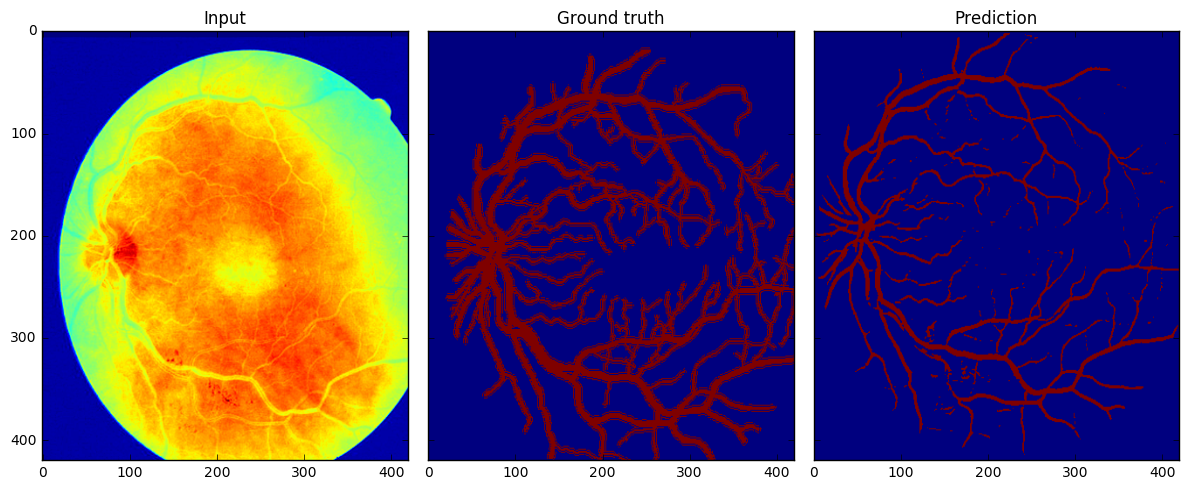

In [71]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()

In [72]:
print("PREDICTION",prediction.shape)

PREDICTION (1, 420, 420, 2)


In [73]:
print("Testing error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Testing error rate: 19.51%


In [74]:
img = util.combine_img_prediction(X_test,Y_test,prediction)
#util.save_image(img, "/Users/cesare.chung/int/retina_problem_Testing.png")
util.save_image(img, "D:/Cesare/tf_UNET_int/retina_problem.png")

In [75]:
####################
# Training result  # Un-scaled
####################

In [76]:
X_test, Y_test = data_provider(1)

prediction = net.predict("./out/model.cpkt", X_test)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-21 14:01:56,110 Restoring parameters from ./out/model.cpkt
2017-11-21 14:02:03,571 Model restored from file: ./out/model.cpkt


In [77]:
print("Training error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Training error rate: 17.21%


In [78]:
img = util.combine_img_prediction(X_test,Y_test,prediction)
#util.save_image(img, "/Users/cesare.chung/int/retina_problem_Training.png")
util.save_image(img, "D:/Cesare/tf_UNET_int/retina_problem.png")

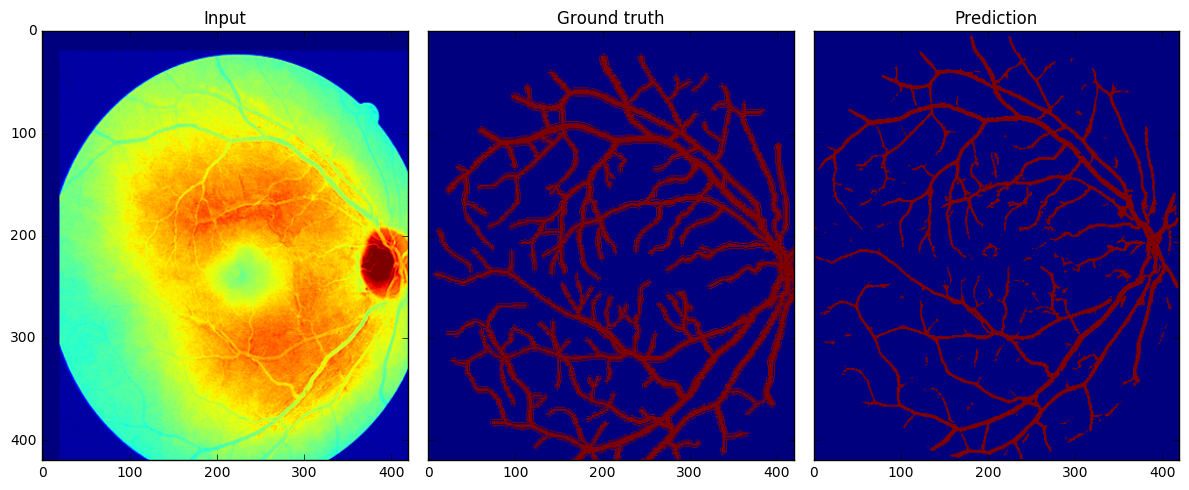

In [79]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()